# C964 Project

### Import Python Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Load the CSV Data

# Only keep 20K rows, normally hase 370K, too much for my machine to handle
# pd.read_csv("FILEPATH", nrows=20000)
# pd.to_csv("NEW_CSV_FILE.csv", index=False)

# Original link to CSV: https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format
uppercaseAlphabetCharactersDataFrame = pd.read_csv("data/a_to_z_handwritten_data_updated_smaller.csv")
uppercaseAlphabetCharactersDataFrame.head()

0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]

In [3]:
uppercaseAlphabetCharactersDataFrame.shape

(10000, 785)

In [4]:
# Check for missing values (NaN - Not a number / null) 
# Check if data is all numerical, (int64, float, ...)
uppercaseAlphabetCharactersDataFrame.isna().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

In [5]:
yForHistogramPlot = uppercaseAlphabetCharactersDataFrame.iloc[:, 0].copy()

In [6]:
letterLabel = {0:"A",1:"B",2:"C",3:"D",4:"E",5:"F",6:"G",7:"H",8:"I",9:"J",10:"K",
               11:"L",12:"M",13:"N",14:"O",15:"P",16:"Q",17:"R",18:"S",19:"T",20:"U",
               21:"V",22:"W",23:"X",24:"Y",25:"Z"}
uppercaseAlphabetCharactersDataFrame.iloc[:,0] = uppercaseAlphabetCharactersDataFrame.iloc[:,0].map(letterLabel)

In [ ]:
# Create x and y
x = df.drop(uppercaseAlphabetCharactersDataFrame.columns[0], axis=1) # Data / Features
y = df.iloc[:, 0].copy() # Select column with index 0, Label, A-Z

In [7]:
# Create x and y
x = uppercaseAlphabetCharactersDataFrame.drop(uppercaseAlphabetCharactersDataFrame.columns[0], axis=1) # Data / Features
y = uppercaseAlphabetCharactersDataFrame.iloc[:, 0].copy() # Select column with index 0, Label, A-Z

# Change from DataFrame type to NumPy Array
x = np.array(x)
y = np.array(y)

In [8]:
x.shape

(10000, 784)

In [9]:
y.shape

(10000,)

### Show a random letter, an example image

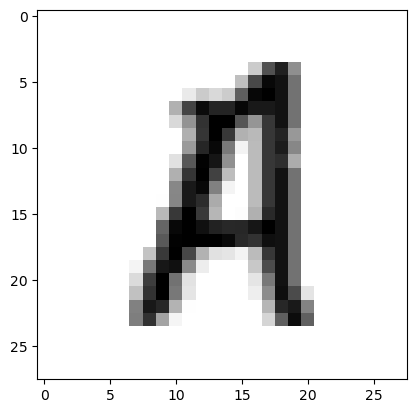

In [10]:
exampleLetterData = x[245] # encoded in integers, representing grayscale color
exampleLetterImage = exampleLetterData.reshape(28,28) # original images are 28 pixels x 28 pixels

# Use MatPlotLib to show an image
plt.imshow(exampleLetterImage,cmap=matplotlib.cm.binary,interpolation="nearest")

In [11]:
# What letter is the random image?
y[245]

'A'

### Split the training and testing data

In [12]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, stratify=y, random_state=42, test_size=0.2)

In [13]:
xTrain.shape

(8000, 784)

In [14]:
xTest.shape

(2000, 784)

In [15]:
model = KNeighborsClassifier(n_neighbors = 1,weights = 'distance')
model.fit(xTrain, yTrain)

KNeighborsClassifier(n_neighbors=1, weights='distance')

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [16]:
yPredictions = model.predict(xTest)

In [17]:
accuracy_score(yTest, yPredictions)

0.9035

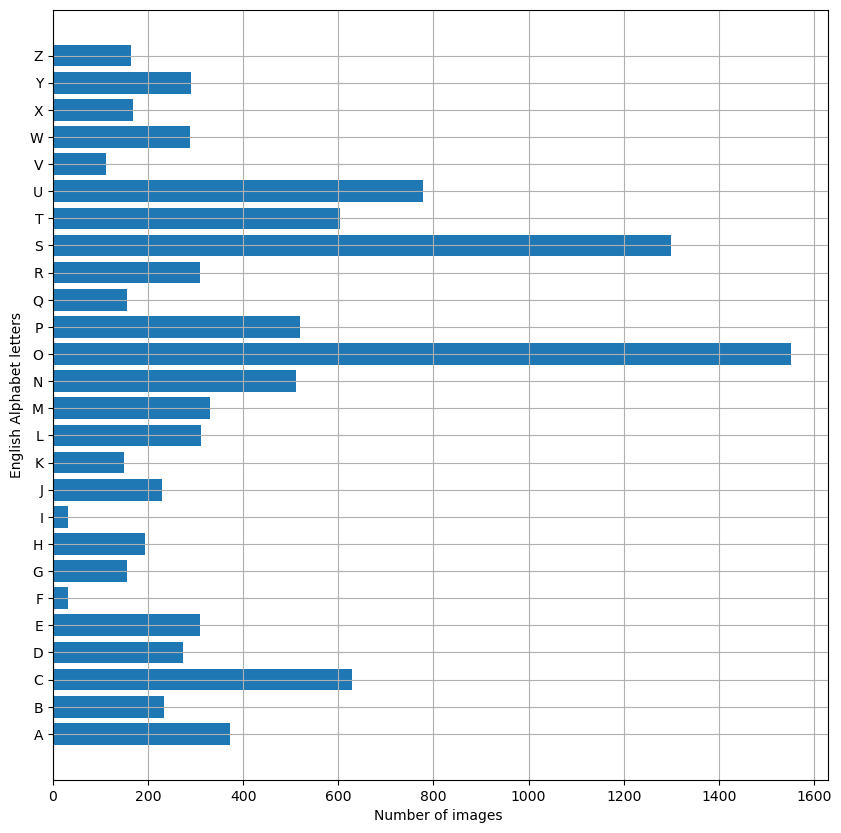

In [18]:
y_int = np.int0(yForHistogramPlot) 
count = np.zeros(26, dtype='int') # create a new array, size 26 with all 0 values
total = 0;
for i in y_int:
    count[i] +=1 #total count of each alphabet
    total += 1
    
alphabets = []
for i in letterLabel.values():
    alphabets.append(i) #all alphabets

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of images ")
plt.ylabel("English Alphabet letters")
plt.grid()
plt.show()

In [19]:
pieSizes = np.zeros(26, dtype='int')

for index in range(len(count)):
    pieSizes[index] = int((count[index] / total) * 100);

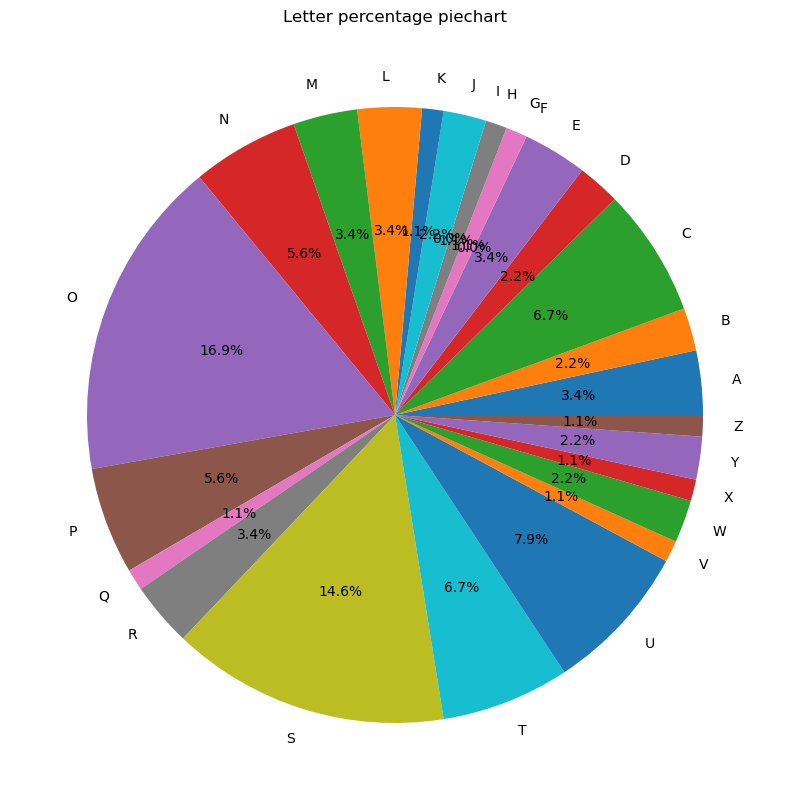

In [20]:
pieLabels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
fig, ax = plt.subplots(figsize=(15,10))
ax.pie(pieSizes, labels=pieLabels, autopct='%1.1f%%');
ax.set_title("Letter percentage piechart")
plt.show()

In [21]:
confusionMatrix = confusion_matrix(yTest, yPredictions)

In [22]:
decisionTreeModel = DecisionTreeClassifier()
decisionTreeModel.fit(xTrain, yTrain)

DecisionTreeClassifier()

Text(158.22222222222223, 0.5, 'True label')

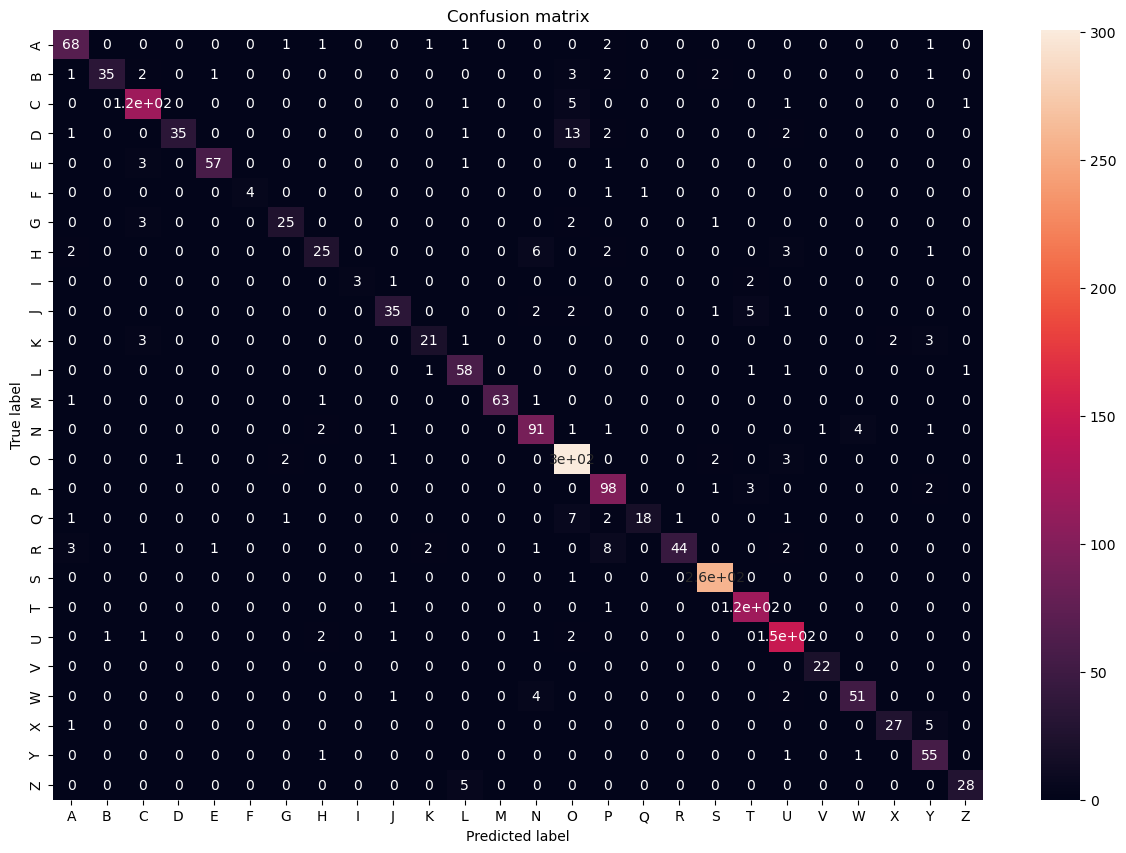

In [23]:
dataFrameConfusionMatrix = pd.DataFrame(confusionMatrix,
                                        index=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"],
                                        columns=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"])
plt.figure(figsize = (15,10))
ax = sn.heatmap(dataFrameConfusionMatrix, annot=True)
ax.set_title("Confusion matrix")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

### Train the K-Nearest Neighbor Estimator / Model

In [24]:
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
ncaPipeline = Pipeline([('nca', nca), ('knn', knn)])
ncaPipeline.fit(xTrain, yTrain)

Pipeline(steps=[('nca', NeighborhoodComponentsAnalysis(random_state=42)),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [25]:
ncaPipeline.score(xTest, yTest)

0.8925

In [26]:
xTest

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Save the trained model

In [27]:
import pickle

# save the sci-kit learn classifier
with open("data/uppercase-english-alphabet-handwritten.pkl", "wb") as fid:
    pickle.dump(ncaPipeline, fid)

### Load the trained model

In [28]:
with open("data/uppercase-english-alphabet-handwritten.pkl", "rb") as fid:
    ncaPipelineLoaded = pickle.load(fid)

### Verify that the loaded classifier works 

In [29]:
ncaPipeline.score(xTest, yTest)

0.8925

### Upload some new test images

1. Covert the image to grayscale
2. Scale to 28 pixels height, By X * 28 pixels width
3. Convert to NumPy Array
4. Test the model score with the new image

In [30]:
import cv2

### Display an example image, unmodified

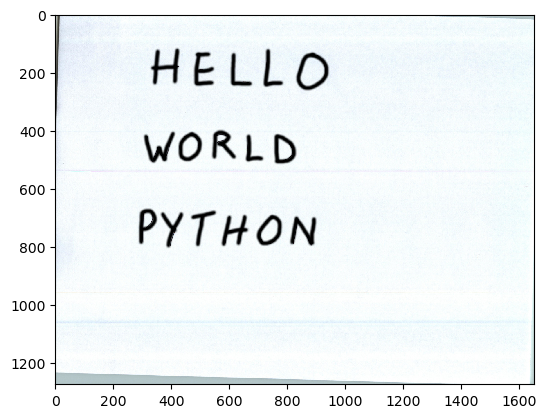

In [42]:
# load an example image
numPyImageArray = plt.imread("images/scanned-images/sample-page-06-handwritten.jpg")

# Use MatPlotLib to display an image
plt.imshow(numPyImageArray, cmap=matplotlib.cm.binary,interpolation="nearest")

### Convert the example image to grayscale

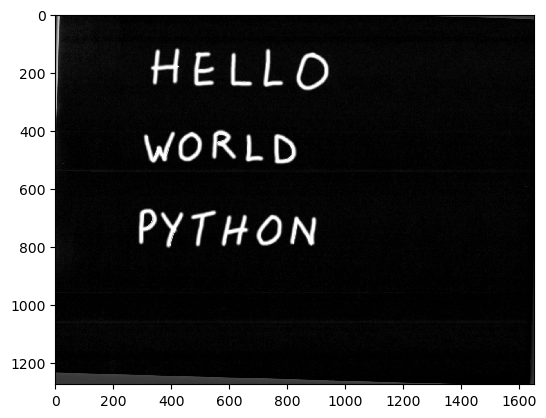

In [43]:
grayscaleImage = cv2.cvtColor(numPyImageArray, cv2.COLOR_BGR2GRAY)

# Use MatPlotLib to display an image
plt.imshow(grayscaleImage, cmap=matplotlib.cm.binary,interpolation="nearest")

### Apply a Gausian blur image filter

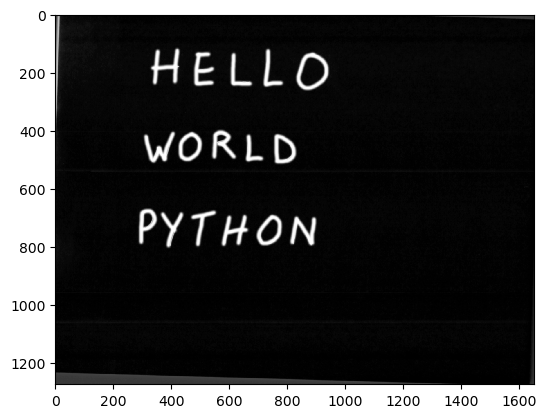

In [44]:
blurredImage = cv2.GaussianBlur(grayscaleImage, (5, 5), 0)

# Use MatPlotLib to display an image
plt.imshow(blurredImage, cmap=matplotlib.cm.binary,interpolation="nearest")

In [45]:
# perform edge detection, find contours in the edge map,
edgeDetectionImage = cv2.Canny(blurredImage, 30, 150)
imageContours = cv2.findContours(edgeDetectionImage.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [35]:
import imutils
from imutils.contours import sort_contours

In [36]:
# sort the resulting contours from left-to-right
imageContours = imutils.grab_contours(imageContours)

In [37]:
imageContours = sort_contours(imageContours, method="left-to-right")[0]

In [38]:
import bounding_box_image as bbi

In [39]:
charactersList = bbi.predictAnImage("data/uppercase-english-alphabet-handwritten.pkl", numPyImageArray)

In [40]:
len(charactersList)

80

In [41]:
j = 0

for (padded, (x, y, width, height)) in charactersList:
    if j == 11:
        newArray = np.reshape(padded, (784, 1))
        # Create list of column names with the format "0.N" (from 1 to N)
        #paddedColumnNames = ['0.' + str(i) for i in np.arange(padded.shape[0]) + 0]
        # Declare pandas.DataFrame object
        paddedDataFrame = pd.DataFrame(newArray)
        
        #print(type(padded))
        #print(type(padded))
        #print(type(x[245]))
        #padded = padded.astype("int64")
        #padded.reset_index().melt('index', var_name='col').set_index('index')[['col']]
        #padded = padded.reshape(-1, 1)
        #padded = np.expand_dims(padded, axis=-1)
        print(len(padded[0]))
        print(len(xTest[0]))
        print(ncaPipelineLoaded.predict(xTest[0]))
    j += 1

28
784


ValueError: Expected 2D array, got 1D array instead:
array=[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 112 198 198 112   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3   8  50 131 226 255
 255 221   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  23  70 108 183 199 232 232 185 185 110   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   5  15 152 203 220 255 250 240
 177  52  52  17   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 103 168 238 255 255 255 152  86  57   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 216 255 255 255 255 189
  59  20  20  20   7   7   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 210 255 255 255 255 205 156 156 156 156  97  97   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 120 232 255 255
 255 255 255 255 255 255 212 212  80   8   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  36 109 191 191 212 255 255 255 255 255 255 255
 203  92   0   0   0   0   0   0   0   0   8  24  24  24   0   0   0   0
  68  68  97 156 165 230 255 255 255 255 255 193   0   0   0   0   0   0
   0   0  84 136 136 136  39   0   0   0   0   0  26  78 104 222 255 255
 255 255 235 144   0   0   0   0   0   0   0   0 208 255 255 255 152  86
  86  86  86  86 119 185 208 255 255 255 247 230 136  23   0   0   0   0
   0   0   0   0 220 255 255 255 250 240 240 240 240 240 245 255 255 255
 255 255 178 125  10   0   0   0   0   0   0   0   0   0 108 215 239 255
 255 255 255 255 255 255 255 255 232 199 183 183  47   0   0   0   0   0
   0   0   0   0   0   0   3  90 158 212 226 255 255 255 255 226 212 212
 131  50   8   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  23  69 112 198 198 198 198 112  69  69   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.